# Flag hits likely due to abundance differences

In [1]:
# Imports
import polars as pl
from tqdm import tqdm
import plotnine as plotnine

In [3]:
# Paths
metrics_dir = "/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/B7B8_1percent_updatedmeta"
prof_dir = "/dgx1nas1/storage/data/jess/repos/2021_09_01_VarChAMP/6.downstream_analysis_snakemake/outputs/batch_profiles"
metrics_df = pl.read_csv(f"{metrics_dir}/metrics.csv")
metrics_wtvar = pl.read_csv(f"{metrics_dir}/metrics_summary.csv")
thresh = 3  # previously 10
min_class_num = 2

In [4]:
test = pl.scan_parquet(
    f"{prof_dir}/2024_01_23_Batch_7/profiles_tcdropped_filtered_var_mad_outlier_featselect_filtcells_metacorr.parquet"
)
meta_cols = [i for i in test.columns if "Metadata" in i]

meta = test.select(meta_cols).collect()
meta

Metadata_plate_map_name,Metadata_well_position,Metadata_source_plate,Metadata_source_well,Metadata_source_numb,Metadata_dest_plate,Metadata_dest_well,Metadata_dest_numb,Metadata_imaging_well,Metadata_imaging_plate_R1,Metadata_imaging_plate_R2,Metadata_orf_id_wt,Metadata_ccsb_mutation_id,Metadata_nt_change_cdna,Metadata_aa_change,Metadata_allele_set,Metadata_imaging_plate,Metadata_batch1,Metadata_batch2,Metadata_clone_ID,Metadata_hgmd_ID,Metadata_clinvar_allele_ID,Metadata_clinvar_clinical_significance,Metadata_vector,Metadata_notes,Metadata_plate,Metadata_quad,Metadata_c96,Metadata_r96,Metadata_r384,Metadata_c384,Metadata_r384_letter,Metadata_Well,Metadata_TableNumber,Metadata_ImageNumber,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ObjectNumber,Metadata_Plate,Metadata_CellID,Metadata_symbol,Metadata_gene_allele,Metadata_node_type
str,str,str,str,f64,str,str,i64,str,str,str,f64,f64,str,str,i64,i64,i64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str
"""B7A1R1_P1""","""C24""","""VUSmut_GDEh05""","""H02""",16.0,"""FVrry_P01_Q02""","""B12""",90,"""C24""","""B7A1R1_P1""","""B8A1R2_P1""",9634.0,216880.0,"""169C>G""","""Gln57Glu""",1,1,7,8,null,null,null,null,527.0,"""""",1,2,12,2,3,24,"""C""","""C24""",469822178,648,30,30,30,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CLDN19""","""CLDN19_Arg200G…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,14,14,14,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,13,13,13,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,12,12,12,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,11,11,11,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,10,10,10,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,8,8,8,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FVrry_P01_Q03""","""H06""",48,"""P11""","""B7A1R1_P1""","""B8A1R2_P1""",268.0,715.0,"""1208G>T""","""Ser403Ile""",1,1,7,8,null,null,null,null,527.0,"""""",1,3,6,8,16,11,"""P""","""P11""",3267680531,3331,7,7,7,"""2024_01_17_B7A…","""2024_01_17_B7A…","""CTNNA3""","""CTNNA3_Val94As…","""allele"""
"""B7A1R1_P1""","""P11""","""VUSmut_GDEh12""","""C09""",67.0,"""FV

In [5]:
# Filter profiles to only include cells from classifiers that passed filters
# Examine median intensity differences

In [6]:
local_wtvar = metrics_wtvar.filter(pl.col("Classifier_type") == "localization")

# Alleles must be mislocalized in both batches
local_wtvar = local_wtvar.with_columns(
    pl.when(pl.col("AUROC_mean") > pl.col("AUROC_thresh"))
    .then(1)
    .otherwise(0)
    .alias("Mislocalized")
).unique()

local_wtvar = local_wtvar.pivot(
    index=["allele_0", "Allele_set"],
    columns="Batch",
    values="Mislocalized",
).with_columns(
    ((pl.col("batch7") == 1) & (pl.col("batch8") == 1)).alias(
        "Mislocalized_both_batches"
    )
)

misloc_alleles = (
    local_wtvar
    # .filter(pl.col("Mislocalized_both_batches"))
    .select("allele_0")
    .to_series()
    .to_list()
)

misloc_wt = (
    local_wtvar
    # .filter(pl.col("Mislocalized_both_batches"))
    .with_columns(pl.col("allele_0").str.replace("_.*", "").alias("wt"))
    .select("wt")
    .to_series()
    .unique()
    .to_list()
)

all_alleles = misloc_alleles + misloc_wt

In [7]:
# Get individual classifiers
ind_class = metrics_df.filter(
    (~pl.col("Metadata_Control"))
    & (pl.col("Training_imbalance") < thresh)
    & (
        pl.col("allele_0").is_in(misloc_alleles)
        & (pl.col("Full_Classifier_ID").str.contains("true"))
    )
)

In [8]:
# Get meta features
b7_alleles = (
    pl.scan_parquet(
        f"{prof_dir}/2024_01_23_Batch_7/profiles_tcdropped_filtered_var_mad_outlier_featselect_filtcells_metacorr.parquet"
    )
    .filter(pl.col("Metadata_gene_allele").is_in(all_alleles))
    .select([
        "Metadata_CellID",
        "Metadata_gene_allele",
        "Metadata_Well",
        "Metadata_Plate",
    ])
)
b8_alleles = (
    pl.scan_parquet(
        f"{prof_dir}/2024_02_06_Batch_8/profiles_tcdropped_filtered_var_mad_outlier_featselect_filtcells_metacorr.parquet"
    )
    .filter(pl.col("Metadata_gene_allele").is_in(all_alleles))
    .select([
        "Metadata_CellID",
        "Metadata_gene_allele",
        "Metadata_Well",
        "Metadata_Plate",
    ])
)

cell_alleles = pl.concat([b7_alleles.collect(), b8_alleles.collect()])

In [9]:
b7_prof = pl.scan_parquet(
    f"{prof_dir}/2024_01_23_Batch_7/profiles.parquet"
).with_columns(
    pl.concat_str(
        [
            "Metadata_Plate",
            "Metadata_Well",
            "Metadata_ImageNumber",
            "Metadata_ObjectNumber",
        ],
        separator="_",
    ).alias("Metadata_CellID")
)
b8_prof = pl.scan_parquet(
    f"{prof_dir}/2024_02_06_Batch_8/profiles.parquet"
).with_columns(
    pl.concat_str(
        [
            "Metadata_Plate",
            "Metadata_Well",
            "Metadata_ImageNumber",
            "Metadata_ObjectNumber",
        ],
        separator="_",
    ).alias("Metadata_CellID")
)

gfp_int = [i for i in b7_prof.columns if "Cells_Intensity" in i]
gfp_int = ["Metadata_CellID"] + [i for i in gfp_int if "GFP" in i]

profiles = pl.concat([
    b7_prof.select(gfp_int).collect(),
    b8_prof.select(gfp_int).collect(),
])

# This method of joining ensures that only cells past filters are included in the abundance analysis
profiles = cell_alleles.join(profiles, on="Metadata_CellID", how="left")

In [10]:
well_profiles = (
    profiles.group_by(["Metadata_Plate", "Metadata_Well", "Metadata_gene_allele"])
    .agg(
        pl.col(col).median().alias(col)
        for col in profiles.columns
        if not col.startswith("Metadata_")
    )
    .drop("Metadata_CellID")
    .unique()
)

In [11]:
import statsmodels.formula.api as smf


def lmm(fix_var: str, rand_var: str, reference: str, var: str, dat):
    # perform stat test
    model = smf.mixedlm(
        f"{fix_var} ~ C(Metadata_gene_allele, Treatment(reference='{reference}'))",
        data=dat,
        groups=dat[rand_var],
    )
    result = model.fit()

    # format results
    summary_df = pl.DataFrame(result.summary().tables[1][1:2])
    summary_df = summary_df.with_columns([
        pl.col(column).cast(pl.Float64).alias(column) for column in summary_df.columns
    ])

    summary_df = summary_df.with_columns(
        pl.lit(reference).alias("Gene"), pl.lit(var).alias("Variant")
    )

    return summary_df

Calculate the difference in intensity across wells using single-cell measurements. This approach suffers from pseudo-replication.

In [12]:
sc_abun_stats = []
for allele in tqdm(misloc_alleles):
    temp_class = ind_class.filter(pl.col("allele_0") == allele)
    temp_prof = profiles.filter(
        (pl.col("Metadata_Plate").is_in(temp_class.select("Plate").to_series()))
        & (
            pl.col("Metadata_Well").is_in(temp_class.select("well_1"))
            | pl.col("Metadata_Well").is_in(temp_class.select("well_0"))
        )
    )
    sc_abun_stats.append(
        lmm(
            "Cells_Intensity_MedianIntensity_GFP",
            "Metadata_Plate",
            allele.split("_")[0],
            allele,
            temp_prof.to_pandas(),
        )
    )

sc_abun_stats = pl.concat(sc_abun_stats, how="vertical")
sc_abun_stats = sc_abun_stats.rename({"z": "U2OS_Z"})

  0%|          | 0/471 [00:00<?, ?it/s]

/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  0%|          | 1/471 [00:00<02:04,  3.77it/s]/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  1%|          | 3/471 [00:00<01:08,  6.87it/s]/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packag

In [13]:
sc_abun_stats.write_csv("../results/sc_abundance_changes.csv")

Calculate differences in abundance using well-aggregated profiles.

In [14]:
well_abun_stats = []
for allele in tqdm(misloc_alleles):
    temp_class = ind_class.filter(pl.col("allele_0") == allele)
    temp_prof = well_profiles.filter(
        (pl.col("Metadata_Plate").is_in(temp_class.select("Plate").to_series()))
        & (
            pl.col("Metadata_Well").is_in(temp_class.select("well_1"))
            | pl.col("Metadata_Well").is_in(temp_class.select("well_0"))
        )
    )
    well_abun_stats.append(
        lmm(
            "Cells_Intensity_MedianIntensity_GFP",
            "Metadata_Plate",
            allele.split("_")[0],
            allele,
            temp_prof.to_pandas(),
        )
    )

well_abun_stats = pl.concat(well_abun_stats, how="vertical")
well_abun_stats = well_abun_stats.rename({"z": "U2OS_Z"})
well_abun_stats.write_csv("../results/well_abundance_changes.csv")

  0%|          | 0/471 [00:00<?, ?it/s]/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  1%|          | 3/471 [00:00<00:15, 29.91it/s]/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/stats

In [15]:
# Compare to dual data
dual_abun = (
    pl.read_csv("../data/abundance_ppi_his3_edgotyping.tsv", separator="\t")
    .filter(pl.col("node_type") == "allele")
    .with_columns(
        pl.concat_str(["symbol", "aa_change"], separator="_").alias("Variant")
    )
    .select(["Variant", "z_abundance_change"])
    .filter(pl.col("z_abundance_change").is_not_null())
    .with_columns(pl.col("z_abundance_change").cast(pl.Float64))
    .rename({"z_abundance_change": "dual_Z"})
)
abun_dual_sc = sc_abun_stats.join(dual_abun, on="Variant", how="left").filter(
    pl.col("dual_Z").is_not_null()
)
abun_dual_well = well_abun_stats.join(dual_abun, on="Variant", how="left").filter(
    pl.col("dual_Z").is_not_null()
)

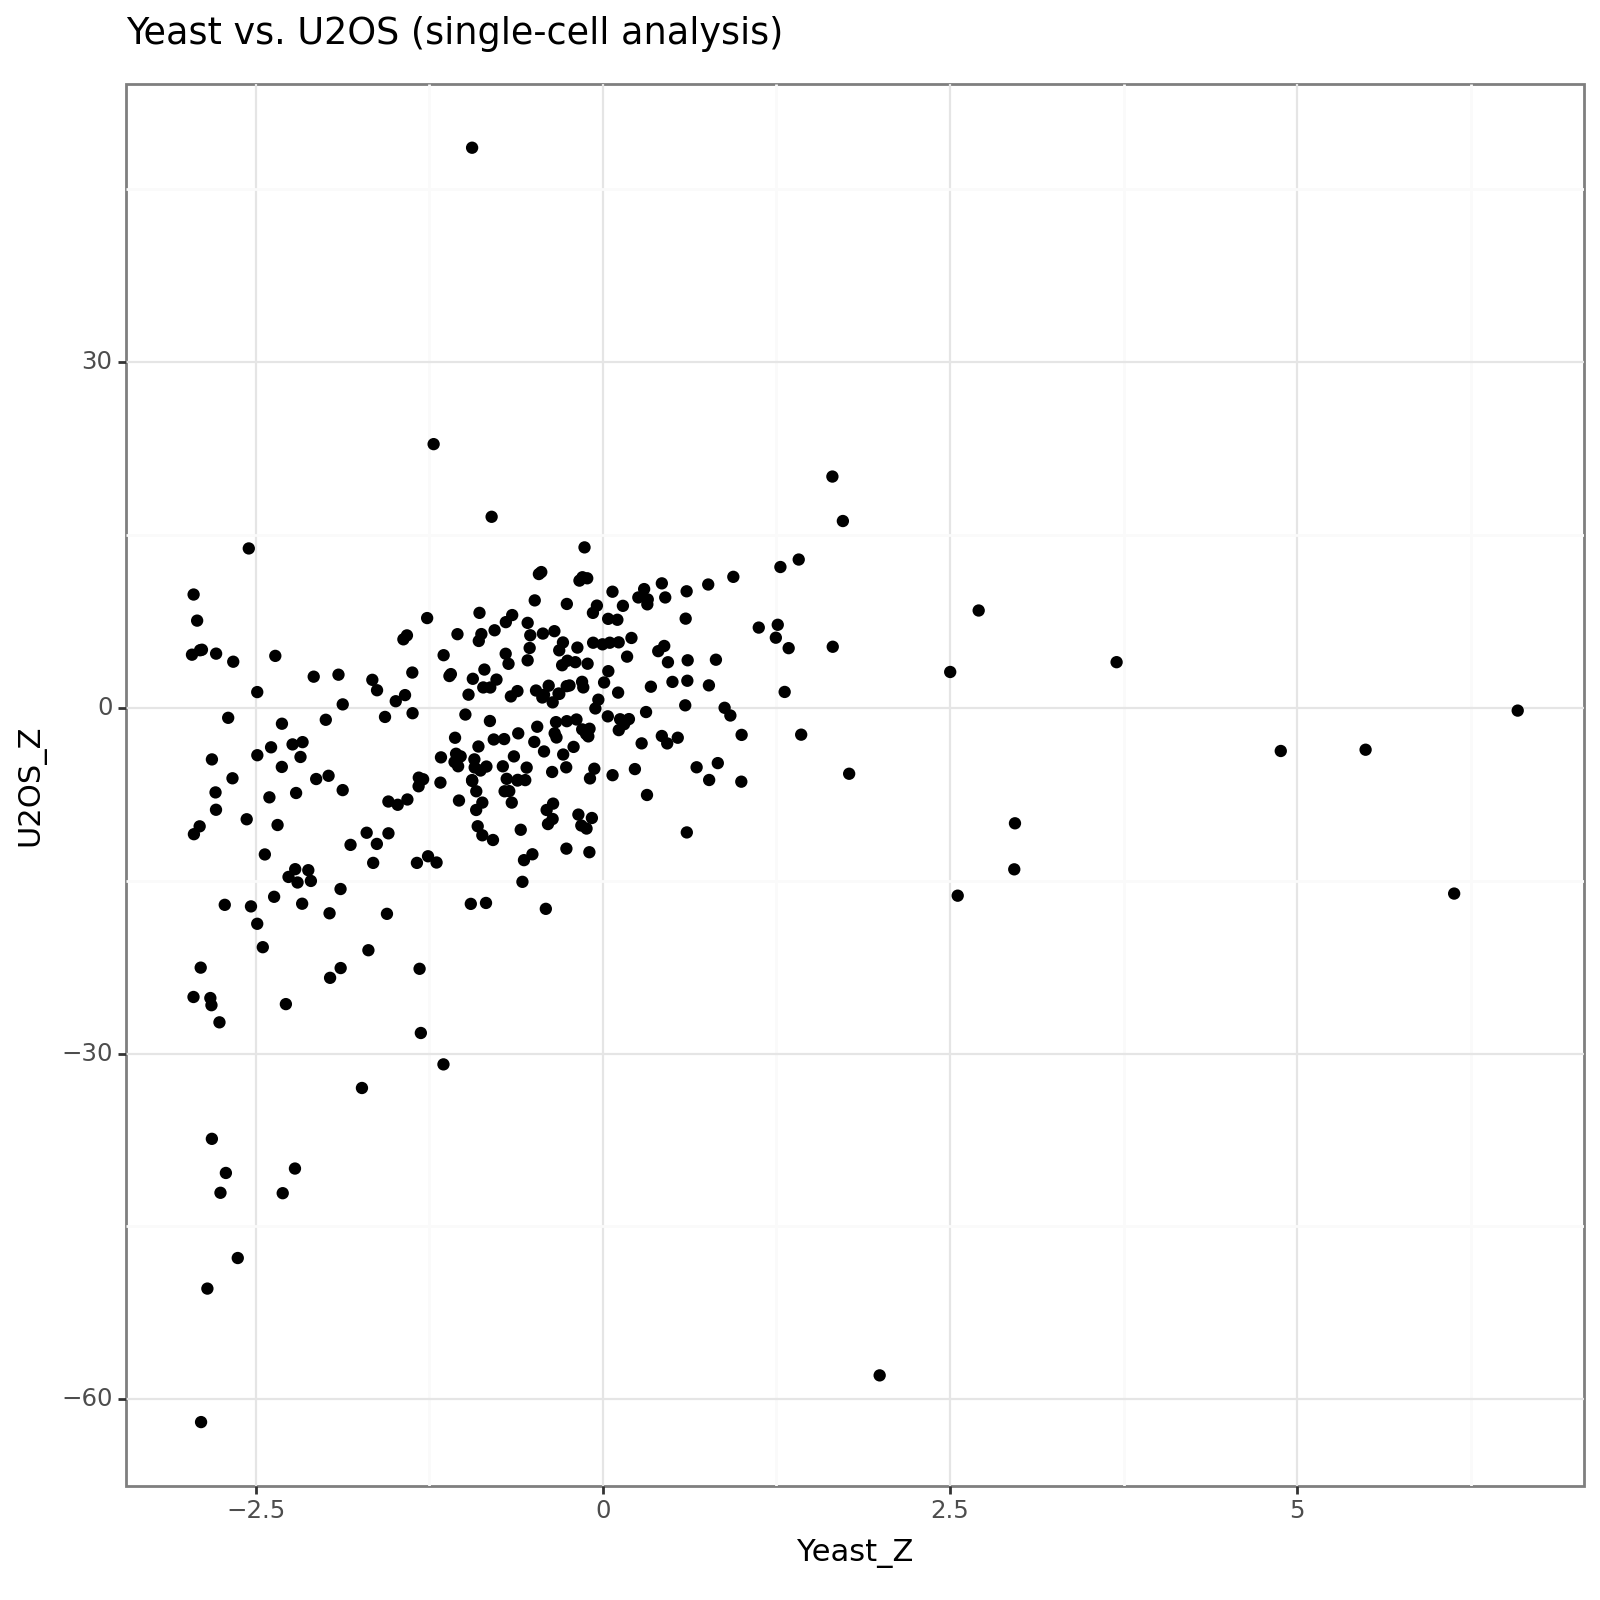

In [16]:
from plotnine import aes, geom_point, ggplot, theme_bw, labs

plotnine.options.figure_size = (8, 8)
plot1 = (
    ggplot(
        abun_dual_sc,
        aes(x="dual_Z", y="U2OS_Z"),
    )
    + geom_point()
    + theme_bw()
    + labs(title="dual vs. U2OS (single-cell analysis)")
)
print(plot1)

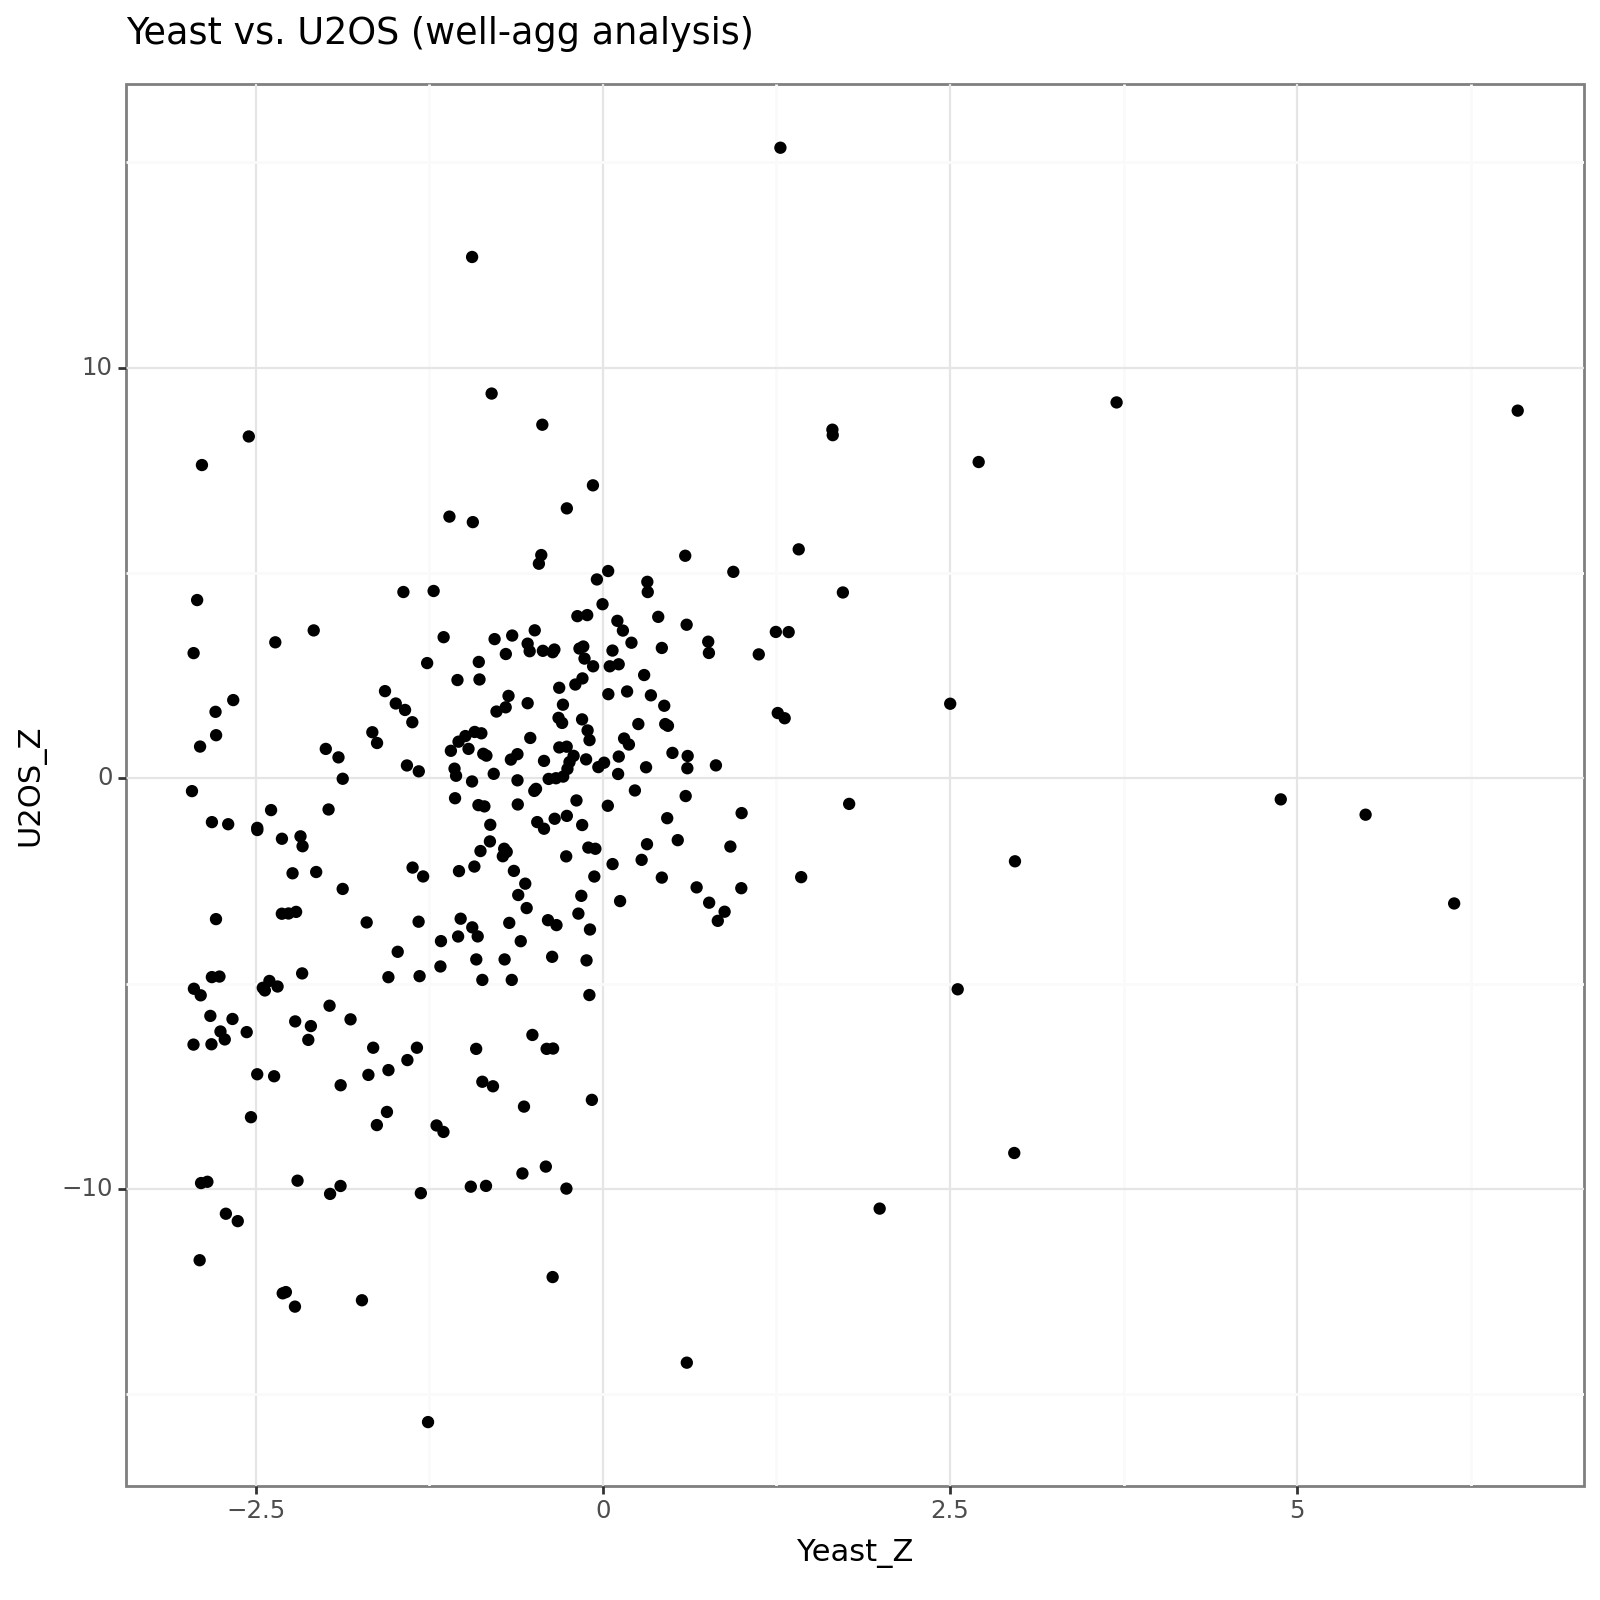

In [17]:
from plotnine import aes, geom_point, ggplot, theme_bw, labs

plotnine.options.figure_size = (8, 8)
plot1 = (
    ggplot(
        abun_dual_well,
        aes(x="dual_Z", y="U2OS_Z"),
    )
    + geom_point()
    + theme_bw()
    + labs(title="dual vs. U2OS (well-agg analysis)")
)
print(plot1)

In [18]:
from scipy.stats import pearsonr

u2os_z = abun_dual_well["U2OS_Z"].to_numpy()
dual_z = abun_dual_well["dual_Z"].to_numpy()

corr_coeff, p_value = pearsonr(u2os_z, dual_z)

print("Well-agg stats: ")
print(f"Pearson correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")


Well-agg stats: 
Pearson correlation coefficient: 0.34207201195222053
P-value: 9.639750102498583e-10


In [19]:
from scipy.stats import pearsonr

u2os_z = abun_dual_sc["U2OS_Z"].to_numpy()
dual_z = abun_dual_sc["dual_Z"].to_numpy()

corr_coeff, p_value = pearsonr(u2os_z, dual_z)

print("Single-cell stats: ")
print(f"Pearson correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Single-cell stats: 
Pearson correlation coefficient: 0.32056490693417244
P-value: 1.1409530313557542e-08


/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


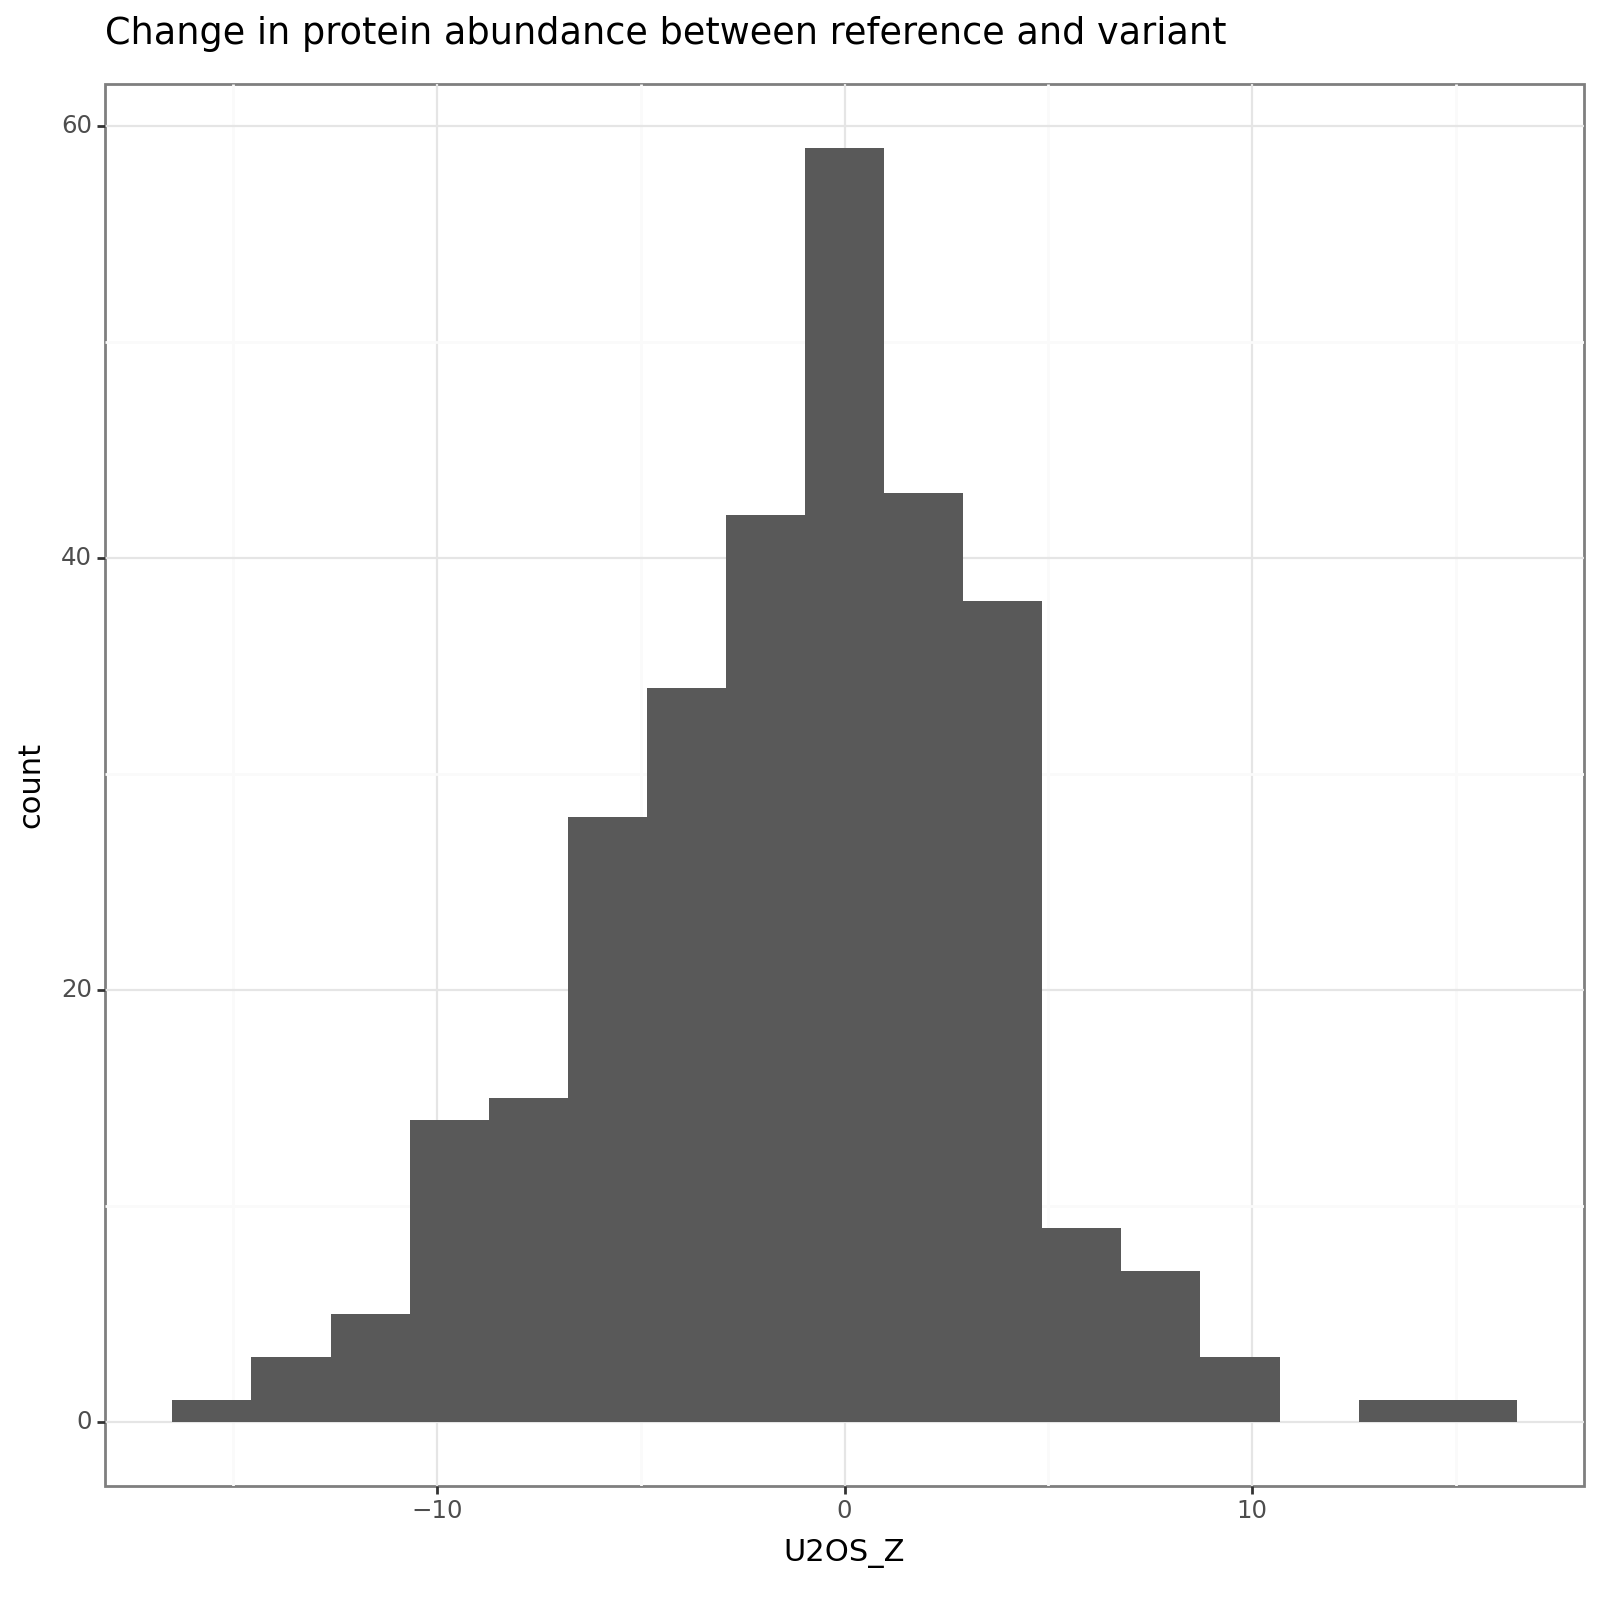

In [20]:
from plotnine import aes, geom_histogram, ggplot, theme_bw, labs

plotnine.options.figure_size = (8, 8)
plot1 = (
    ggplot(
        abun_dual_well,
        aes(x="U2OS_Z"),
    )
    + geom_histogram()
    + theme_bw()
    + labs(title="Change in protein abundance between reference and variant")
)
print(plot1)

## Analyze wrt clinvar annotations

In [12]:
well_abun_stats = pl.read_csv("../results/well_abundance_changes.csv")

clinvar = pl.read_csv("../data/allele_collection_clinical_significance.csv")
clinvar = clinvar.with_columns(
    pl.concat_str(["symbol", "aa_change"], separator="_").alias("Variant")
).select(["Variant", "clinvar_cs"]).with_columns(
    pl.when(pl.col("clinvar_cs").is_not_null()).then("clinvar_cs").otherwise(pl.lit("not provided")).alias("clinvar_cs")
)

well_abun_stats = well_abun_stats.join(clinvar, on="Variant")

/dgx1nas1/storage/data/jess/miniforge3/envs/varchamp/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.


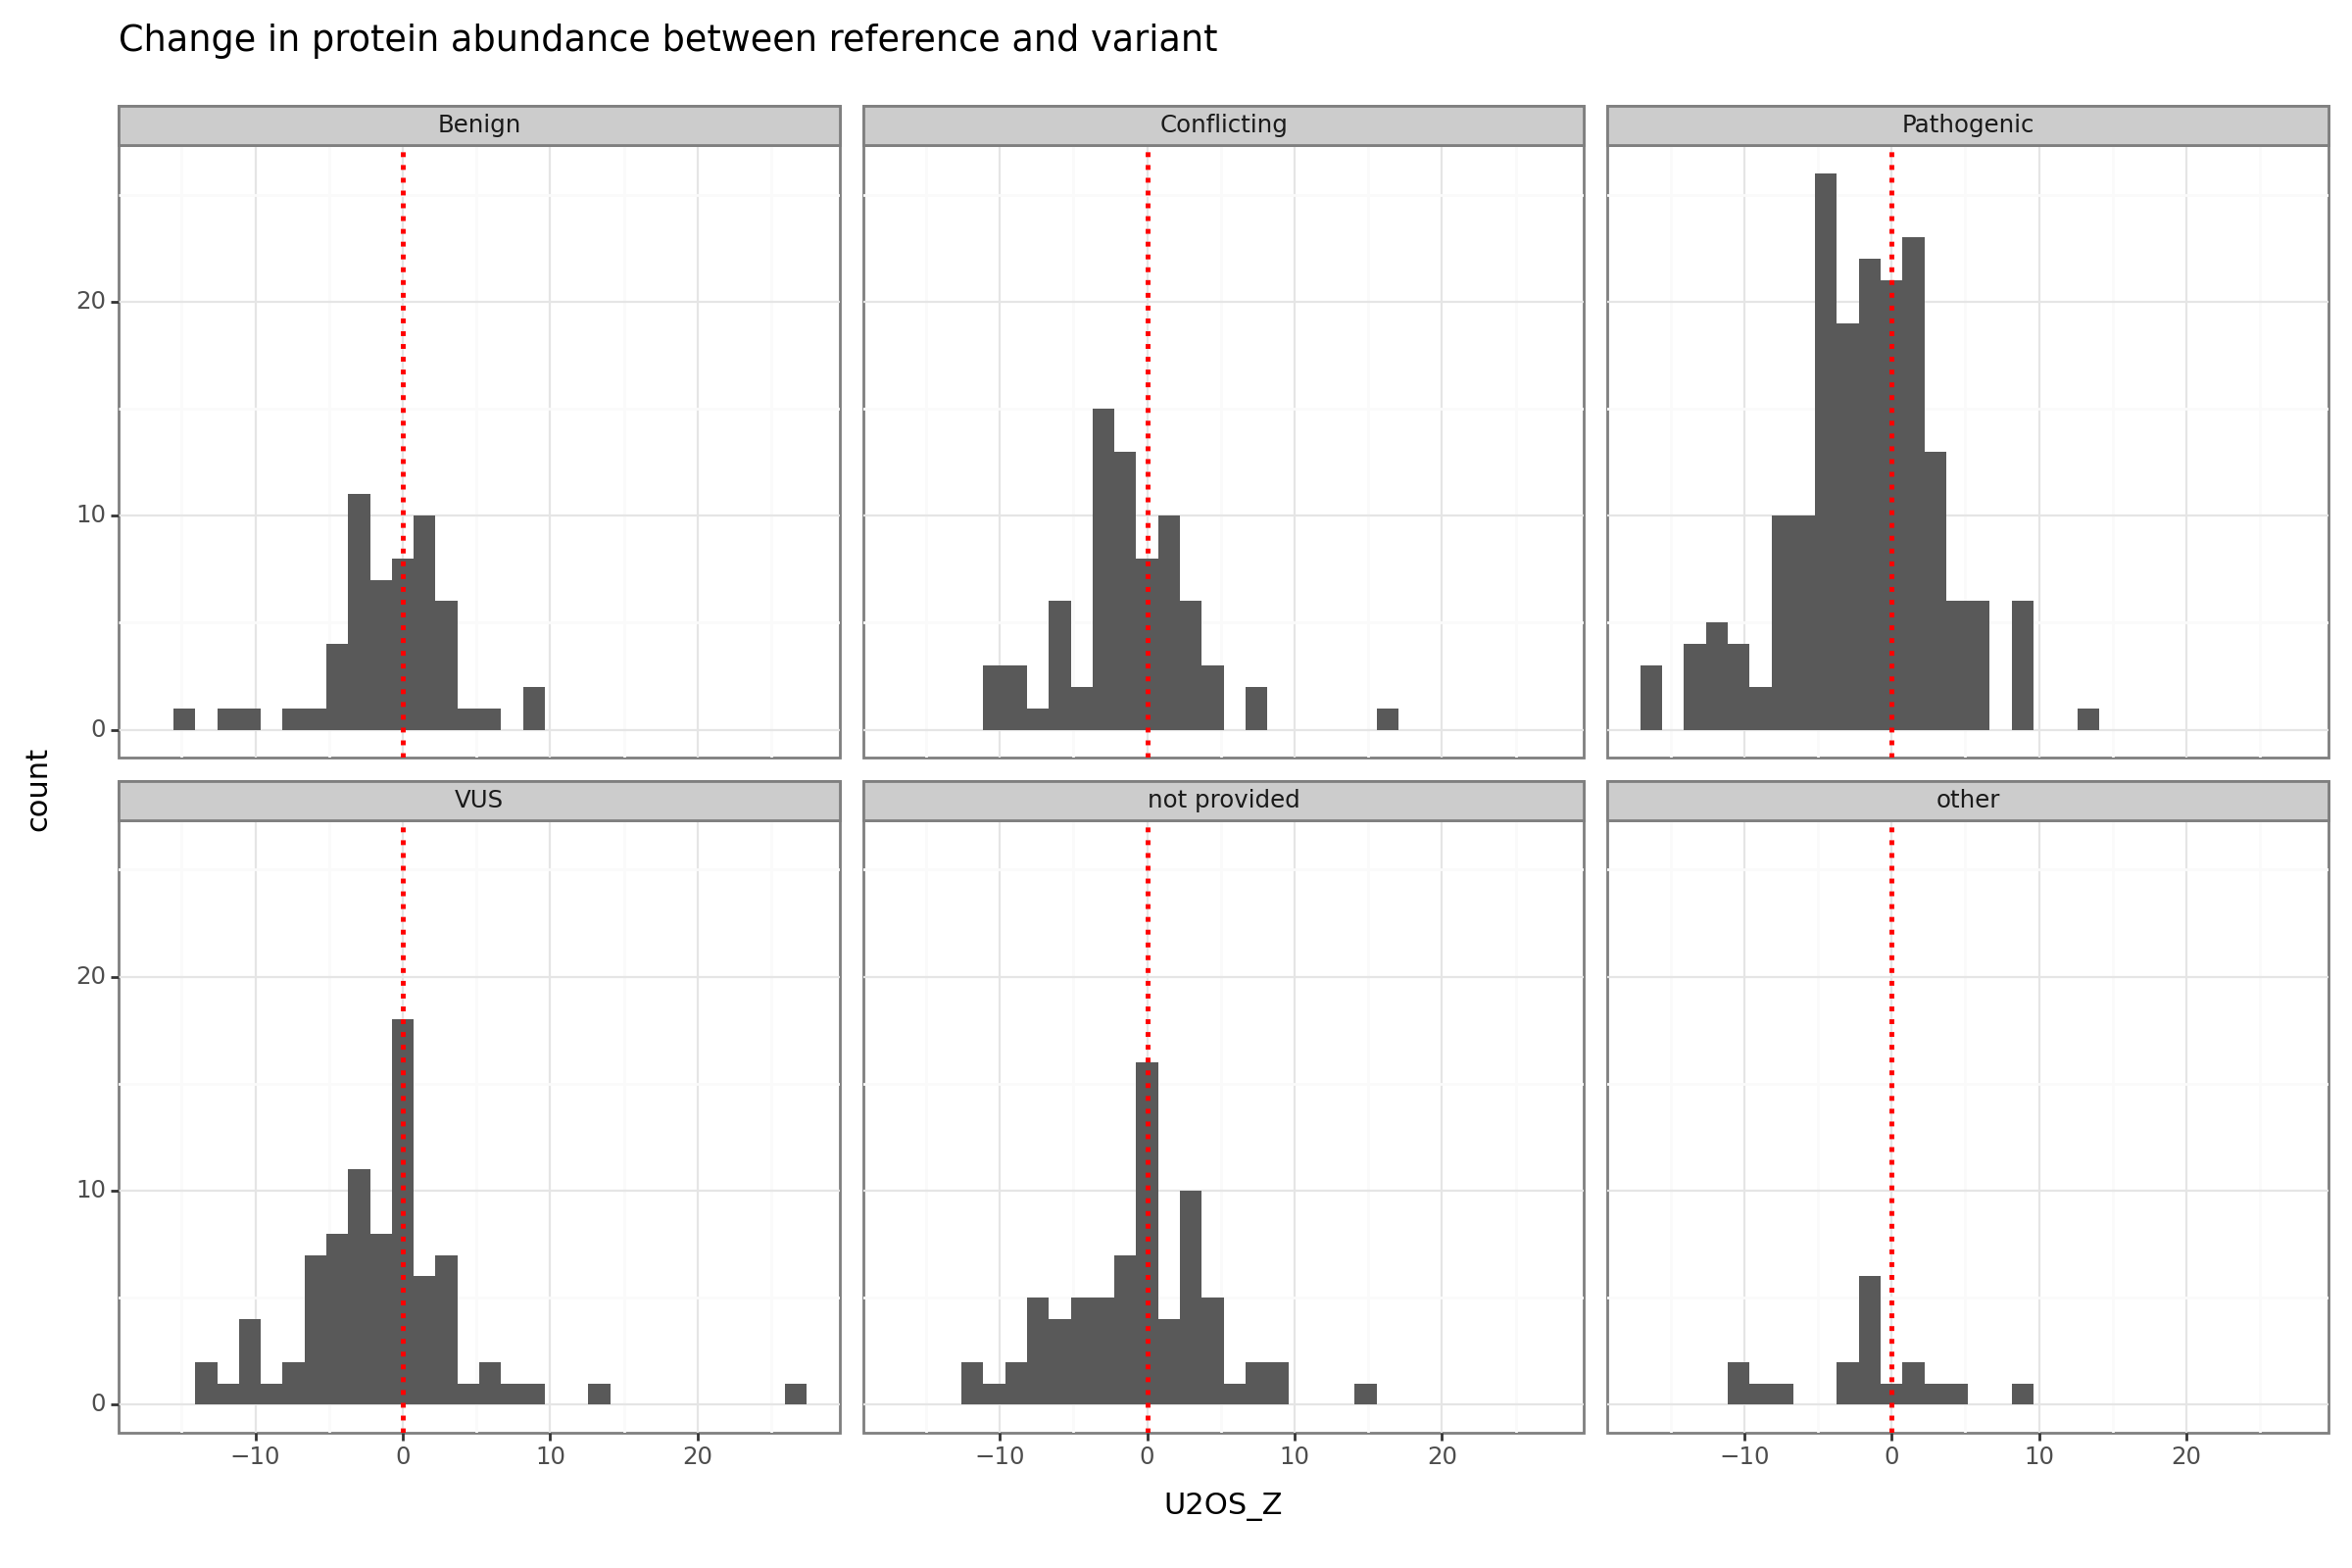

In [17]:
from plotnine import aes, geom_histogram, ggplot, theme_bw, labs, facet_wrap, geom_vline

plotnine.options.figure_size = (12, 8)
plot1 = (
    ggplot(
        well_abun_stats,
        aes(x="U2OS_Z"),
    )
    + geom_histogram()
    + facet_wrap("clinvar_cs")
    + geom_vline(xintercept=0, color="red", linetype="dotted", size=1)
    + theme_bw()
    + labs(title="Change in protein abundance stratefied by clinvar")
)
print(plot1)